In [1]:
import graphlab as gl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import random

##Loading in the data

In [73]:
data_set = 'star5'
df_data = pd.read_csv(data_set+'.csv')
sf_data = gl.SFrame(df_data)
sf_data

Climb,User,rating
12554,107224644,3
1752,107224644,3
8259,107224644,3
3183,107224644,3
10726,107224644,3
2558,106542095,3
9089,106542095,3
1937,106542095,3
7171,106542095,3
7814,106542095,4


##Regularization value: Making a first run.

In [132]:
n=2
regularization_vals = np.logspace(-1,-5,5)
print regularization_vals
mse_scores = []
for i in range(n):
    (train_set, test_set) = sf_data.random_split(0.8)
    models = [gl.factorization_recommender.create(train_set, 'User', 'Climb', 'rating',
                                                  max_iterations=500000, num_factors=5,
                                                  regularization=r,
                                                  verbose=False)
              for r in regularization_vals]
    mse_scores += [gl.evaluation.rmse(test_set['rating'], mod.predict(test_set))
                  for mod in models]


[ERROR] Toolkit error: Cancelled by user.


[  1.00000000e-01   1.00000000e-02   1.00000000e-03   1.00000000e-04
   1.00000000e-05]
PROGRESS: Recsys training: model = factorization_recommender


ToolkitError: Cancelled by user.

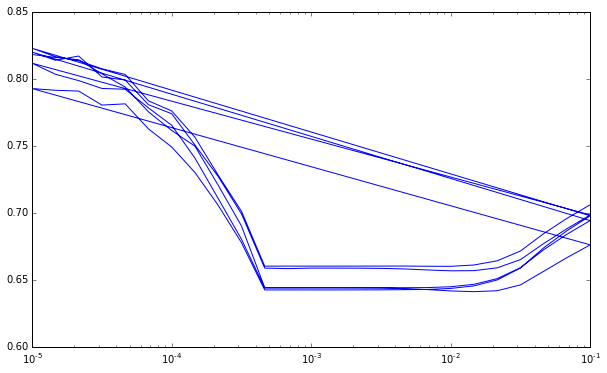

In [28]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.semilogx(list(regularization_vals)*n,mse_scores)

##Latent Feature Selection

In [59]:
n=5
num_factors = range(5)
mse_scores = []
# train_set = sf_data
# test_set=sf_data
for i in range(n):
    (train_set, test_set) = sf_data.random_split(0.8)
    models = [gl.factorization_recommender.create(train_set, 'User', 'Climb', 'rating',
                                                  max_iterations=5000, 
                                                  num_factors=num,
                                                  regularization=1e-3,
                                                  verbose=True)
              for num in num_factors]
    mse_scores += [gl.evaluation.rmse(test_set['rating'], mod.predict(test_set))
                  for mod in models]

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 10 observations with 5 users and 4 items.
PROGRESS:     Data prepared in: 0.001261s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 0        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0.001    |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | linear_regularization          | L2 Regularization on Linear Coefficients         

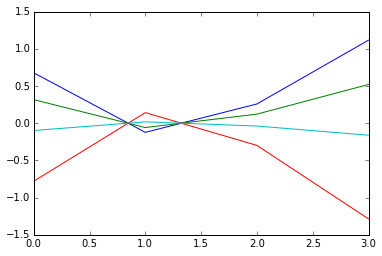

In [60]:
a = models[4]['coefficients']
plt.plot(a['Climb']['factors'][0])
plt.plot(a['Climb']['factors'][1])
plt.plot(a['Climb']['factors'][2])
plt.plot(a['Climb']['factors'][3])
#plt.plot(a['Climb']['factors'][4])


In [61]:
len(mse_scores[:len(num_factors)*n])

25

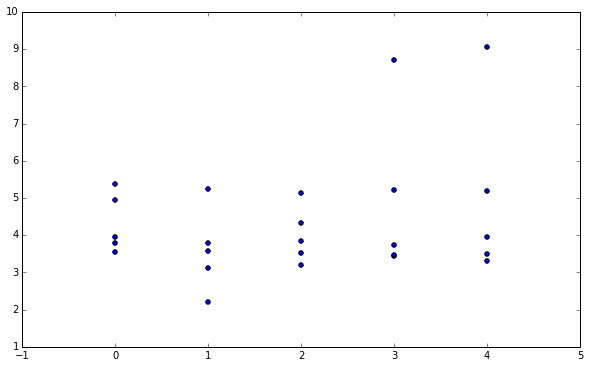

In [62]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.scatter(list(num_factors)*n,mse_scores[:len(num_factors)*n])

In [105]:
user = [random.choice(df_data.User.unique())]
models[1].get_similar_users(user, k=19)

PROGRESS: Getting similar users completed in 0.000979


User,similar,distance,rank
12237,109888470,1.0,1
12237,106603406,1.0,2
12237,106303310,1.0,3
12237,105849353,1.0,4
12237,107417154,1.0,5
12237,108088424,1.0,6
12237,106087896,1.0,7
12237,107045204,1.0,8
12237,106116385,1.0,9
12237,107931930,1.0,10


In [106]:
item = [random.choice(df_data.Climb.unique())]
models[1].get_similar_items(item, k=19)

PROGRESS: Getting similar items completed in 0.001452


Climb,similar,distance,rank
2550,7593,1.0,1
2550,12065,1.0,2
2550,2767,1.0,3
2550,250,1.0,4
2550,9607,1.0,5
2550,7280,1.0,6
2550,4941,1.0,7
2550,4955,1.0,8
2550,8838,1.0,9
2550,7052,1.0,10


##Test each observed item feature

In [ ]:
#Currently in Observed Features notebook

##Popularity Recommender

In [138]:
data_set_pop = 'star5'
df_data_pop = pd.read_csv(data_set+'.csv')
sf_data_pop = gl.SFrame(df_data_pop)
sf_data_pop

Climb,User,rating
105989461,107860315,5
105857287,107860315,4
105983489,107860315,5
105762201,107860315,4
105753838,107860315,4
105753754,107860315,4
105753760,107860315,4
105753391,107860315,4
105753397,107860315,5
105753394,107860315,3


In [139]:
df_obs = pd.read_csv(data_set+'_observed_features.csv')
df_obs.head()

,Climb,location,rating,rating_dif,star_votes,stars,sub_location,type
0,105741011,Idaho,14.5,0,164,3.8,City of Rocks,Trad
1,105822918,Utah,14.5,0,102,4.1,Wasatch Range,Trad
2,105721840,California,17.5,0,80,3.8,Joshua Tree National Park,Trad
3,105858078,International,21.0,0,57,4.2,North America,Sport
4,105732260,Nevada,17.5,0,154,4.1,Red Rock,Trad


In [140]:
m_pop = gl.recommender.popularity_recommender.create(sf_data,
                                             user_id='User', 
                                             item_id='Climb', 
                                             target='rating')

PROGRESS: Recsys training: model = popularity
PROGRESS: Preparing data set.
PROGRESS:     Data has 9659 observations with 259 users and 299 items.
PROGRESS:     Data prepared in: 0.010941s
PROGRESS: 9659 observations to process; with 299 unique items.


In [141]:
user = [random.choice(df_data.User.unique())]
m_pop.get_similar_users(user, k=19)

PROGRESS: Getting similar users completed in 0.000495


User,similar,distance,rank
106020445,10232,20736.0,1
106020445,10185,13924.0,2
106020445,105936209,12321.0,3
106020445,14537,9216.0,4
106020445,10168,7921.0,5
106020445,14213,7396.0,6
106020445,106192059,5476.0,7
106020445,14015,5184.0,8
106020445,10481,5041.0,9
106020445,106554608,4489.0,10


##Ranking Factorization Recommender

In [160]:
data_set_rank = 'star35'
df_data_rank = pd.read_csv(data_set+'.csv')
sf_data_rank = gl.SFrame(df_data_rank)
sf_data_rank

df_data_dummies = pd.concat([df_data, 
                            pd.get_dummies(df_data.rating)], 
                            axis = 1).drop('rating',1)
sf_data_dummies = gl.SFrame(df_data_dummies)
sf_data_dummies

Climb,User,1,2,3,4,5
12554,107224644,0.0,0.0,1.0,0.0,0.0
1752,107224644,0.0,0.0,1.0,0.0,0.0
8259,107224644,0.0,0.0,1.0,0.0,0.0
3183,107224644,0.0,0.0,1.0,0.0,0.0
10726,107224644,0.0,0.0,1.0,0.0,0.0
2558,106542095,0.0,0.0,1.0,0.0,0.0
9089,106542095,0.0,0.0,1.0,0.0,0.0
1937,106542095,0.0,0.0,1.0,0.0,0.0
7171,106542095,0.0,0.0,1.0,0.0,0.0
7814,106542095,0.0,0.0,0.0,1.0,0.0


In [102]:
n=1
num_factors = range(3)
mse_scores = []
# train_set = sf_data
# test_set=sf_data
for i in range(n):
    (train_set, test_set) = sf_data_dummies.random_split(0.8)
    models = [gl.ranking_factorization_recommender.create(train_set, 'User', 'Climb',
                                                  max_iterations=5000, 
                                                  num_factors=num,
                                                  regularization=1e-3,
                                                  verbose=True)
              for num in num_factors]

PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 257633 observations with 7560 users and 13674 items.
PROGRESS:     Data prepared in: 0.138691s
PROGRESS: Training ranking_factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 0        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0.001    |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | linear_regularization          | L2 Regularization on L

RuntimeError: Runtime Exception. Column name rating does not exist.

In [120]:
mse_scores += [mod.evaluate(test_set)
                  for mod in models]

PROGRESS: recommendations finished on 1000/6917 queries. users per second: 14346.8
PROGRESS: recommendations finished on 2000/6917 queries. users per second: 17159.3
PROGRESS: recommendations finished on 3000/6917 queries. users per second: 18990
PROGRESS: recommendations finished on 4000/6917 queries. users per second: 20102
PROGRESS: recommendations finished on 5000/6917 queries. users per second: 20015.1
PROGRESS: recommendations finished on 6000/6917 queries. users per second: 20039.6

Precision and recall summary statistics by cutoff

[WARNING] Model trained without a target. Skipping RMSE computation.



+--------+------------------+------------------+
| cutoff |  mean_precision  |   mean_recall    |
+--------+------------------+------------------+
|   5    | 0.00965736591008 | 0.00638103761552 |
|   10   | 0.00890559491109 | 0.0118857851726  |
|   15   | 0.00829839525806 | 0.0163148277374  |
+--------+------------------+------------------+
[3 rows x 3 columns]

PROGRESS: recommendations finished on 1000/6917 queries. users per second: 2139.28
PROGRESS: recommendations finished on 2000/6917 queries. users per second: 2146.76
PROGRESS: recommendations finished on 3000/6917 queries. users per second: 2146.85
PROGRESS: recommendations finished on 4000/6917 queries. users per second: 2146.86
PROGRESS: recommendations finished on 5000/6917 queries. users per second: 2146.68
PROGRESS: recommendations finished on 6000/6917 queries. users per second: 2146.87

Precision and recall summary statistics by cutoff

[WARNING] Model trained without a target. Skipping RMSE computation.



+--------+------------------+------------------+
| cutoff |  mean_precision  |   mean_recall    |
+--------+------------------+------------------+
|   5    | 0.0108717652161  | 0.00737417355473 |
|   10   | 0.00890559491109 | 0.0121931226971  |
|   15   | 0.00830803334779 | 0.0165735664318  |
+--------+------------------+------------------+
[3 rows x 3 columns]

PROGRESS: recommendations finished on 1000/6917 queries. users per second: 2226.62
PROGRESS: recommendations finished on 2000/6917 queries. users per second: 2247.93
PROGRESS: recommendations finished on 3000/6917 queries. users per second: 2254.92
PROGRESS: recommendations finished on 4000/6917 queries. users per second: 2258.31
PROGRESS: recommendations finished on 5000/6917 queries. users per second: 2259.99
PROGRESS: recommendations finished on 6000/6917 queries. users per second: 2253.77

Precision and recall summary statistics by cutoff

[WARNING] Model trained without a target. Skipping RMSE computation.



+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+------------------+
|   5    | 0.0108717652161 | 0.00737417355473 |
|   10   | 0.0088477663727 | 0.0121651947645  |
|   15   | 0.0082791190786 | 0.0165748171586  |
+--------+-----------------+------------------+
[3 rows x 3 columns]



0.50505450405524499

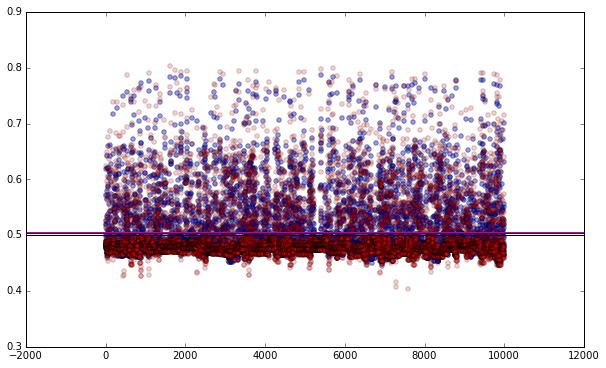

In [159]:
n_points = 10000
pred_set = train_set
pred_set2 = train_set
fig, ax = plt.subplots(1, figsize=(10, 6))
# for model in models:
#     ax.plot(model.predict(test_set)[:n_points])
ax.scatter(range(n_points),models[0].predict(pred_set)[:n_points],
#            -models[0].predict(pred_set)[:n_points], 
           alpha=.4)
ax.scatter(range(n_points),models[2].predict(pred_set2)[:n_points],
#              -models[0].predict(pred_set2)[:n_points], 
           alpha=.2, c='r')
ax.axhline(y=np.average(models[0].predict(pred_set)), c ='b')
ax.axhline(y=np.average(models[2].predict(pred_set2)), c ='r')
ax.axhline(y=0.5, c ='k')
np.average(models[2].predict(pred_set)[:n_points])

ValueError: x and y must be the same size

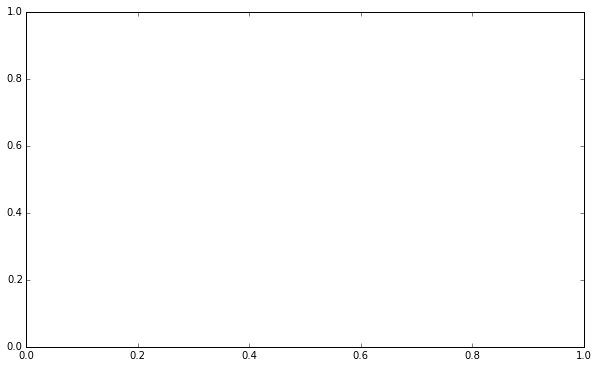

In [111]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.scatter(num_factors*n,mse_scores[:len(num_factors)*n])

In [108]:
models[1].recommend()

PROGRESS: recommendations finished on 1000/7560 queries. users per second: 2114.96
PROGRESS: recommendations finished on 2000/7560 queries. users per second: 2137.56
PROGRESS: recommendations finished on 3000/7560 queries. users per second: 2139.5
PROGRESS: recommendations finished on 4000/7560 queries. users per second: 2142.19
PROGRESS: recommendations finished on 5000/7560 queries. users per second: 2144.11
PROGRESS: recommendations finished on 6000/7560 queries. users per second: 2143.85
PROGRESS: recommendations finished on 7000/7560 queries. users per second: 2143.14


User,Climb,score,rank
107224644,11373,0.806304522824,1
107224644,9479,0.804643762217,2
107224644,608,0.790383866513,3
107224644,12801,0.78574148582,4
107224644,9882,0.781334307634,5
107224644,2028,0.77634871826,6
107224644,3244,0.776250716402,7
107224644,3232,0.774087112693,8
107224644,272,0.768750563788,9
107224644,11822,0.758075611662,10


In [110]:
models[2].recommend(k=2).print_rows(num_rows = 40)

PROGRESS: recommendations finished on 1000/7560 queries. users per second: 2092.49
PROGRESS: recommendations finished on 2000/7560 queries. users per second: 2110.7
PROGRESS: recommendations finished on 3000/7560 queries. users per second: 2117.13
PROGRESS: recommendations finished on 4000/7560 queries. users per second: 2122.7
PROGRESS: recommendations finished on 5000/7560 queries. users per second: 2130.58
PROGRESS: recommendations finished on 6000/7560 queries. users per second: 2145.63
PROGRESS: recommendations finished on 7000/7560 queries. users per second: 2154.51
+-----------+-------+----------------+------+
|    User   | Climb |     score      | rank |
+-----------+-------+----------------+------+
| 107224644 | 11373 | 0.804437339119 |  1   |
| 107224644 |  9479 | 0.803186092005 |  2   |
| 106542095 | 11373 | 0.801575440513 |  1   |
| 106542095 |  9479 | 0.800310427853 |  2   |
| 109258734 | 11373 | 0.796402801059 |  1   |
| 109258734 |  9479 | 0.795113240458 |  2   |
| 10724

##Rank Matrix Factorization with item features

In [172]:
pd.concat( [df_obs['location'],df_obs['rating'],df_obs['type'] ], 1).head()

,location,rating,type
0,Utah,22.75,Trad
1,Colorado,19.50,Trad
2,International,17.50,Sport
3,California,13.00,Trad
4,Utah,28.00,Sport


In [174]:
data_set_rf = 'star5'
df_data_rf = pd.read_csv(data_set+'.csv').drop('rating', 1)
sf_data_rf = gl.SFrame(df_data_rank)

df_obs = pd.read_csv(data_set+'_observed_features.csv')

df_obs = pd.concat( [df_obs['Climb'],
                           df_obs['location'],
                           df_obs['rating'],
                           df_obs['type'] ], 1)
sf_obs = gl.SFrame(df_obs)
sf_obs

Climb,location,rating,type
105834134,Utah,22.75,Trad
106181256,Colorado,19.5,Trad
105920111,International,17.5,Sport
106208618,California,13.0,Trad
105718117,Utah,28.0,Sport
105868666,Colorado,20.0,Trad
106449034,California,21.0,Sport
105947723,New Hampshire,19.0,Sport
105732860,Nevada,15.5,Trad
108873104,South Dakota,25.0,Sport


In [ ]:
# n=1
# num_factors = range(3)
# mse_scores = []
# # train_set = sf_data
# # test_set=sf_data
# for i in range(n):
#     (train_set, test_set) = sf_data_rf.random_split(0.8)
#     models = [gl.ranking_factorization_recommender.create(train_set, 'User', 'Climb',
#                                                   max_iterations=5000, 
#                                                   num_factors=num,
#                                                   regularization=1e-3,
#                                                   verbose=True)
#               for num in num_factors]
    
m_ob = []
n=3
for i in range(n):/2
    (train_set, test_set) = sf_data_rf.random_split(0.8)
    
    #No observed item features for comparison
    m_ob += [gl.ranking_factorization_recommender.create(train_set, 'User', 'Climb',
                                        verbose = False,
                                        max_iterations=50000, num_factors=5, 
                                        regularization=0.001)]
    #Iterate through each observed item feature
    for col in df_obs.columns[1:]:
        df_ob = pd.concat( (df_obs.Climb, df_obs[col]) , axis=1)
        sf_ob = gl.SFrame(df_ob)
        m_ob += [gl.ranking_factorization_recommender.create(train_set, 'User', 'Climb',
                                        item_data = sf_obs,
                                        verbose = False,
                                        max_iterations=50000, num_factors=5, 
                                        regularization=0.001)]

#Scratch Work